<a href="https://colab.research.google.com/github/AjanitDevs/AjanitDevs/blob/main/Brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import keras

In [ ]:
from keras.models import Sequential

In [ ]:
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
from sklearn.preprocessing import OneHotEncoder

CLASSIFICATION OF THE ONE HOT ENCODING CLASSES

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
data = []
paths = []
result = []


FOR IMAGES WITH TUMOR
(assigning the encoder value "1")

In [ ]:
for r,d,f in os.walk(r"/content/gdrive/MyDrive/brain tumor data/brain_tumor_dataset/yes"):
   for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

FOR IMAGES WITHOUT TUMOR
(assigning the encoder value "0")

In [ ]:
paths = []
for r,d,f in os.walk(r'/content/gdrive/MyDrive/brain tumor data/brain_tumor_dataset/no'):
   for file in  f:
     if '.jpg' in file:
       paths.append(os.path.join(r,file))
   for path in paths:
     img = Image.open(path)
     img = img.resize((128,128))
     img = np.array(img)
     if(img.shape==(128,128,3)):
       data.append(np.array(img))
       result.append(encoder.transform([[0]]).toarray())   


In [ ]:
data = np.array(data)

In [ ]:
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)

In [ ]:
result = result.reshape(139,2)

LET US SPLIT THE DATA INTO TRAINING AND TESTING

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size = 0.3,random_state = 0)

LET US BUILD THE MODEL


In [ ]:
model = Sequential()
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
model.add(Conv2D(32,kernel_size = (2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size = (2,2),activation = 'relu',padding = 'Same'))
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

In [ ]:
model.add(Dense(512, activation = 'relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(2, activation = 'softmax'))

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics = ['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 flatten (Flatten)           (None, 131072)            0

In [ ]:
y_train.shape

(97, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40)

Epoch 1/30
3/3 [==============================] - 7s 1s/step - loss: 26.2096 - accuracy: 0.4639
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 17.1875 - accuracy: 0.7938
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 6.1441 - accuracy: 0.8557
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 7.2158 - accuracy: 0.8557
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 2.5742 - accuracy: 0.9175
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 3.3437 - accuracy: 0.8866
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 5.0122 - accuracy: 0.9381
Epoch 8/30
3/3 [==============================] - 4s 1s/step - loss: 1.3317 - accuracy: 0.9485
Epoch 9/30
3/3 [==============================] - 4s 1s/step - loss: 0.3540 - accuracy: 0.9794
Epoch 10/30
3/3 [==============================] - 4s 1s/step - loss: 1.0558 - accuracy: 0.9588
Epoch 11/30
3/3 [==============================

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

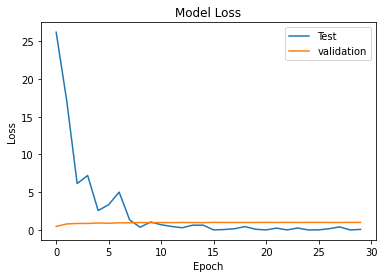

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'validation'], loc= 'upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No,Its not a tumor'

100.0%Confidence This is No,Its not a tumor


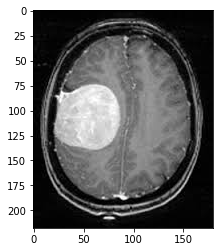

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/gdrive/MyDrive/brain tumor data/brain_tumor_dataset/yes/Y1.jpg")
x = np.array(img.resize((128,128)))
x= x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '%Confidence This is ' + names(classification))